In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('clustering.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [5]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df = df.drop(['Unnamed: 0','Class','Gender','Customer Type','Type of Travel','Ease of Online booking','satisfaction','id', 'Age','Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling','Checkin service','Inflight service','Departure Delay in Minutes','Arrival Delay in Minutes','Seat comfort','Online boarding','Gate location'],axis=1)

In [8]:
df = df.reindex(columns=['Cleanliness','Food and drink'])
df.head()

,Cleanliness,Food and drink
0,5,5
1,1,1
2,5,5
3,2,2
4,3,4


In [9]:
df.describe()

,Cleanliness,Food and drink
count,103904.000000,103904.000000
mean,3.286351,3.202129
std,1.312273,1.329533
min,0.000000,0.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


## Iniciamos K-Means

In [10]:
cluster_numbers = range(1, 10)
models = [KMeans(n_clusters = cluster) for cluster in cluster_numbers]
score = [model.fit(df).score(df) for model in models]

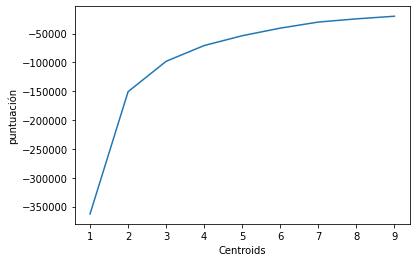

In [11]:
plt.plot(cluster_numbers, score)
plt.xlabel('Centroids')
plt.ylabel('puntuación')
plt.show()

In [12]:
k_means = KMeans(n_clusters=3)
k_means.fit(df)

KMeans(n_clusters=3)

In [13]:
k_means.cluster_centers_

array([[3.53257434, 2.67206347],
       [1.5835482 , 1.70659648],
       [4.17385601, 4.4961311 ]])

In [14]:
labels = ['vuelo con execelente salubridad',   'vuelo no salubre', 'vuelo decente']

In [15]:
df2 = pd.read_csv('clustering.csv')

In [16]:
df2['salubridad'] = k_means.labels_

In [17]:
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,salubridad
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,2
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,2
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,1
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,2
